In [1]:
## Import Libraries

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## Load Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [6]:
BuyerRatio = pd.read_csv('BuyerRatio.csv')

In [7]:
BuyerRatio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [9]:
BuyerRatio.head(10)

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [10]:
BuyerRatio.shape

(2, 5)

In [11]:
BuyerRatio.dtypes

Observed Values    object
East                int64
West                int64
North               int64
South               int64
dtype: object

In [12]:
BuyerRatio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [13]:
BuyerRatio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [14]:
East=BuyerRatio['East'].mean()
print('East Mean = ',East)

East Mean =  242.5


In [15]:
West=BuyerRatio['West'].mean()
print('West Mean = ',West)


West Mean =  832.5


In [16]:
North=BuyerRatio['North'].mean()
print('North Mean = ',North)

North Mean =  743.5


In [17]:
South=BuyerRatio['South'].mean()
print('South Mean = ',South)

South Mean =  410.0


In [18]:
#The Null and Alternative Hypothesis


In [22]:
# There are no significant differences between the groups' mean values. H0:μ1=μ2=μ3=μ4=μ5

# There is a significant difference between the groups' mean values. Ha:μ1≠μ2≠μ3≠μ4



In [23]:
## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


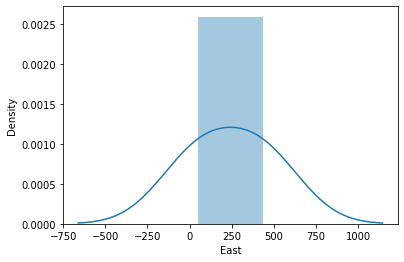

In [24]:
sns.distplot(BuyerRatio['East'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


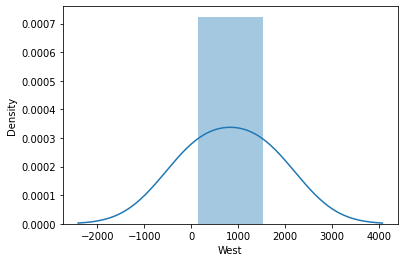

In [25]:
sns.distplot(BuyerRatio['West'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


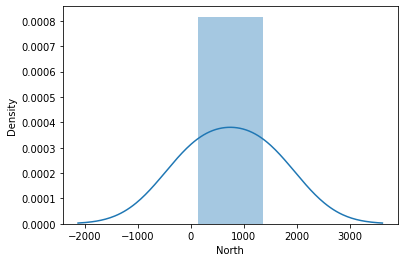

In [26]:
sns.distplot(BuyerRatio['North'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


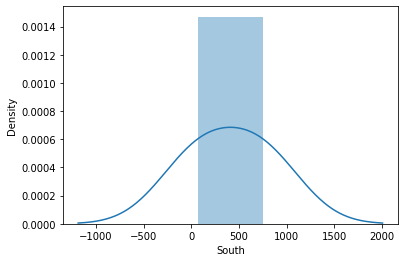

In [27]:
sns.distplot(BuyerRatio['South'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

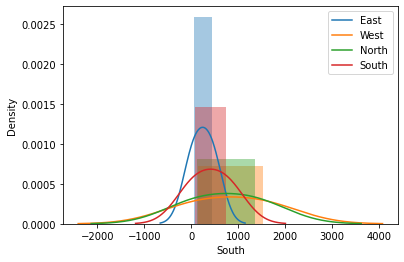

In [28]:
sns.distplot(BuyerRatio['East'])
sns.distplot(BuyerRatio['West'])
sns.distplot(BuyerRatio['North'])
sns.distplot(BuyerRatio['South'])
plt.legend(['East','West','North','South'])


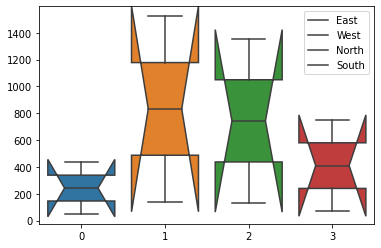

In [29]:
sns.boxplot(data=[BuyerRatio['East'],BuyerRatio['West'],BuyerRatio['North'],BuyerRatio['South']],notch=True)
plt.legend(['East','West','North','South'])


In [30]:
## Hypothesis Testing

In [31]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [32]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')


Test t=1.595946 p-value=0.660309
Interpret by p-Value


In [33]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we will accept null hypothesis') 

we will accept null hypothesis


In [34]:
## Critical Values

In [35]:
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
critical_value 


7.814727903251179

In [36]:
## Degree of Freedom

In [37]:
observed_chi_val = chiStats[0]
print('Interpret by critical value')


Interpret by critical value


In [39]:
if observed_chi_val <= critical_value:
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    print ('Null hypothesis cannot be excepted (variables are not independent)')


Null hypothesis cannot be rejected (variables are not related)


In [40]:
#Inference : proportion of male and female across regions is same
